# 1. Import Required Libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import geopandas as gpd



# 2. Load the Dataset

In [52]:
df = pd.read_csv("uber_data.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

# 3. Data Cleaning

In [53]:
# Check for missing values
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [54]:
# Convert date columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [20]:
# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [21]:
# Verify conversion
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                    int64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                         int64
store_and_fwd_flag                object
dropoff_longitude                float64
dropoff_latitude                 float64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
pickup_hour                        int32
day_of_week                       object
passenger_cancellation              bool
driver_cancellation                 bool
dtype: object


In [23]:
# Check for invalid datetime entries
print("\nInvalid Date Entries:")
print(df[df['tpep_pickup_datetime'].isnull() | df['tpep_dropoff_datetime'].isnull()])


Invalid Date Entries:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, pickup_longitude, pickup_latitude, RatecodeID, store_and_fwd_flag, dropoff_longitude, dropoff_latitude, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount]
Index: []


In [22]:
# Remove rows with invalid dates
df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [23]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [26]:
# Display the cleaned dataset
print("\nCleaned Data:")
print(df.head())


Cleaned Data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1           2016-03-01   2016-03-01 00:07:55                1   
1         1           2016-03-01   2016-03-01 00:11:06                1   
2         2           2016-03-01   2016-03-01 00:31:06                2   
3         2           2016-03-01   2016-03-01 00:00:00                3   
4         2           2016-03-01   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.74612

In [27]:
# Save the cleaned dataset
df.to_csv('cleaned_uber_data.csv', index=False)

# Step 4: Plot the Graphs

# LINE Graph

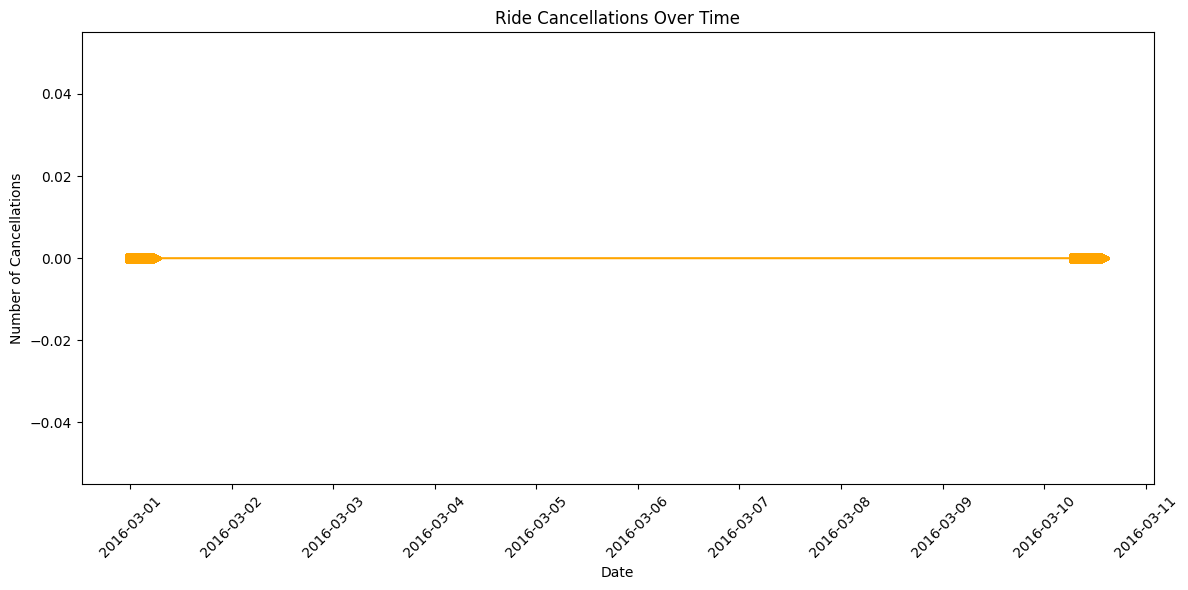

In [46]:
cancellations_over_time = df.copy()

# Create a 'cancellation' column based on whether dropoff data is missing
cancellations_over_time['cancellation'] = cancellations_over_time['tpep_dropoff_datetime'].isna().astype(int)

# Group by pickup time to count cancellations over time
cancellations_over_time = cancellations_over_time.groupby('tpep_pickup_datetime').agg({'cancellation': 'sum'}).reset_index()

# Ensure the pickup datetime is already in datetime format
cancellations_over_time['tpep_pickup_datetime'] = pd.to_datetime(cancellations_over_time['tpep_pickup_datetime'])

# Create a line chart for cancellations over time
plt.figure(figsize=(12, 6))
plt.plot(cancellations_over_time['tpep_pickup_datetime'], cancellations_over_time['cancellation'], marker='>', color='orange')
plt.title('Ride Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# •	Bar Chart for Driver vs Passenger Cancellations

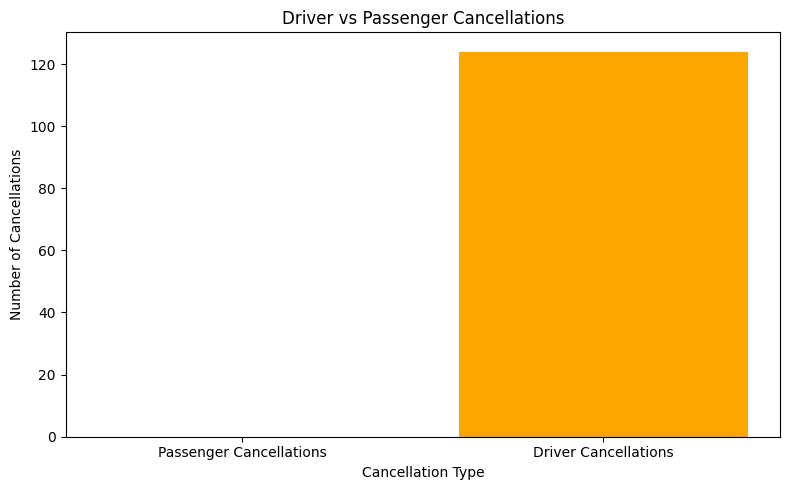

In [47]:

# Identify cancellations
df['passenger_cancellation'] = (df['tpep_dropoff_datetime'] == 'Y')  # Assuming null means cancellation
df['driver_cancellation'] = (df['store_and_fwd_flag'] == 'Y')  # Example condition for driver cancellation

# Count cancellations
passenger_cancellations = df['passenger_cancellation'].sum()
driver_cancellations = df['driver_cancellation'].sum()

# Prepare data for the bar chart
cancellation_counts = {
    'Passenger Cancellations': passenger_cancellations,
    'Driver Cancellations': driver_cancellations
}

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(cancellation_counts.keys(), cancellation_counts.values(), color=['blue', 'orange'])
plt.title('Driver vs Passenger Cancellations')
plt.xlabel('Cancellation Type')
plt.ylabel('Number of Cancellations')


# Show the plot
plt.tight_layout()
plt.show()

# •	Heatmap for Correlation Between Factors:

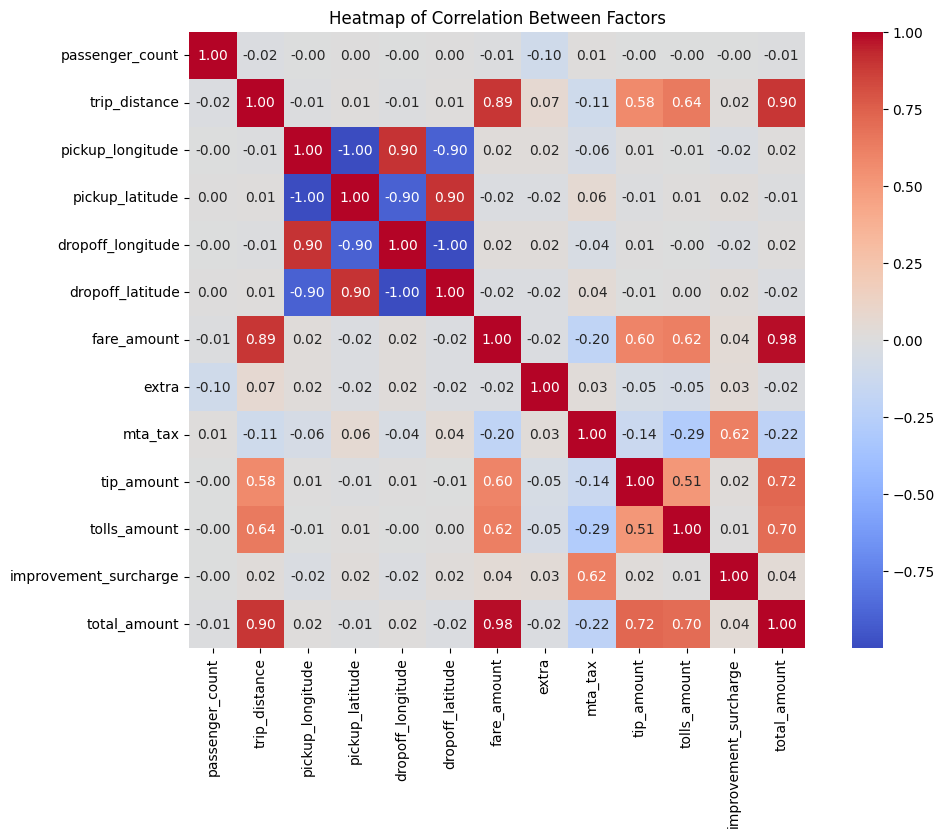

In [13]:
# Select relevant numerical columns for correlation
numerical_columns = [
    'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 
    'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra', 
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'
]

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Heatmap of Correlation Between Factors')
plt.show()

# •	Time vs. Cancellations (Hour of the Day):

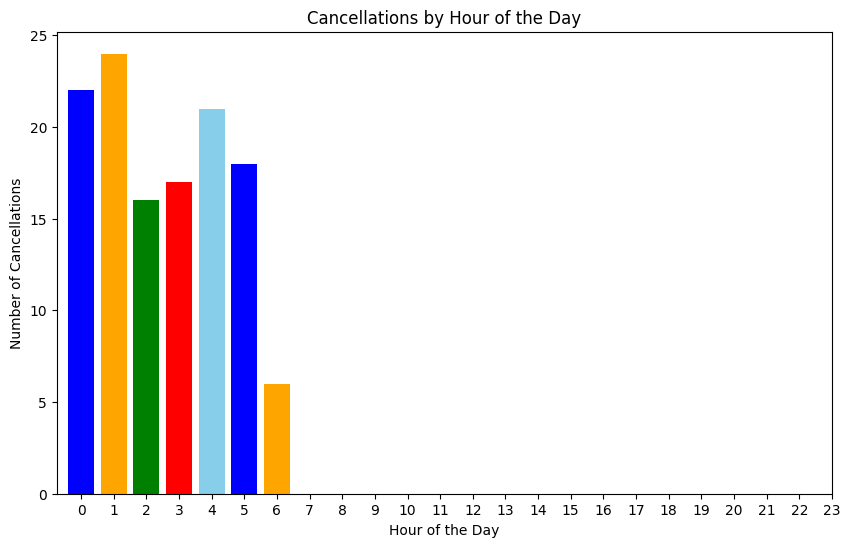

In [41]:
# Create a new column for the hour of the day based on pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Assuming that a cancellation is represented by 'store_and_fwd_flag' being 'Y' for cancellations
cancellations = df[df['store_and_fwd_flag'] == 'Y']

# Count cancellations by hour
cancellation_counts = cancellations['pickup_hour'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(cancellation_counts.index, cancellation_counts.values, color =['blue', 'orange', 'green','red','skyblue'] )
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Cancellations')
plt.title('Cancellations by Hour of the Day')
plt.xticks(range(24))  # Show all hours
plt.show()

 # • Total Trips by Day of the Week

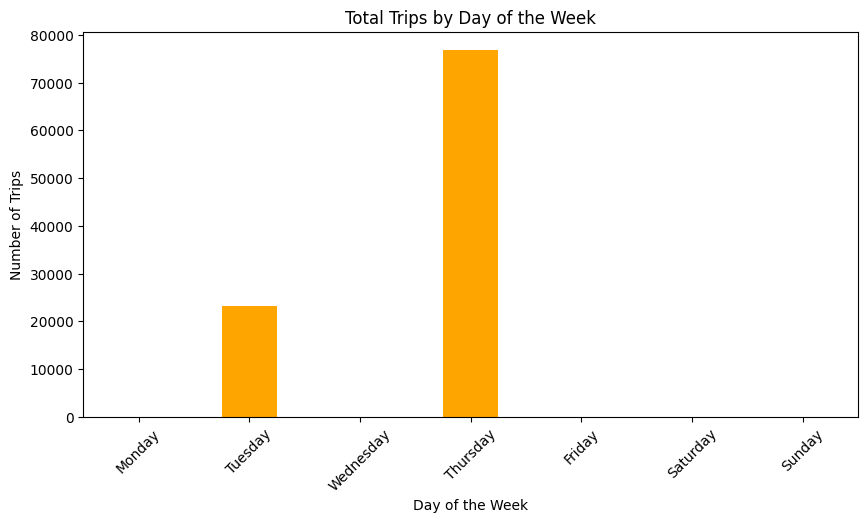

In [48]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Count trips by day of the week
trips_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create the bar chart
plt.figure(figsize=(10, 5))
trips_by_day.plot(kind='bar', color=['green','orange'])
plt.title('Total Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Cancellation Rate by Vendor

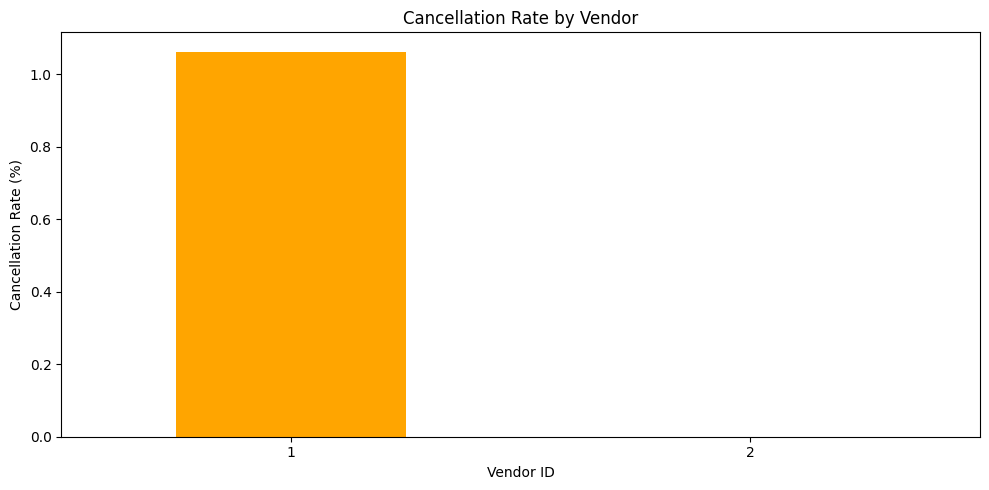

In [38]:
total_trips = df.groupby('VendorID').size()
cancellations = df[df['store_and_fwd_flag'] == 'Y'].groupby('VendorID').size()

# Step 2: Calculate cancellation rate
cancellation_rate = (cancellations / total_trips) * 100  # Convert to percentage

# Step 3: Create a bar chart
plt.figure(figsize=(10, 5))
cancellation_rate.plot(kind='bar', color='orange')
plt.title('Cancellation Rate by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histogram for Fare Distribution

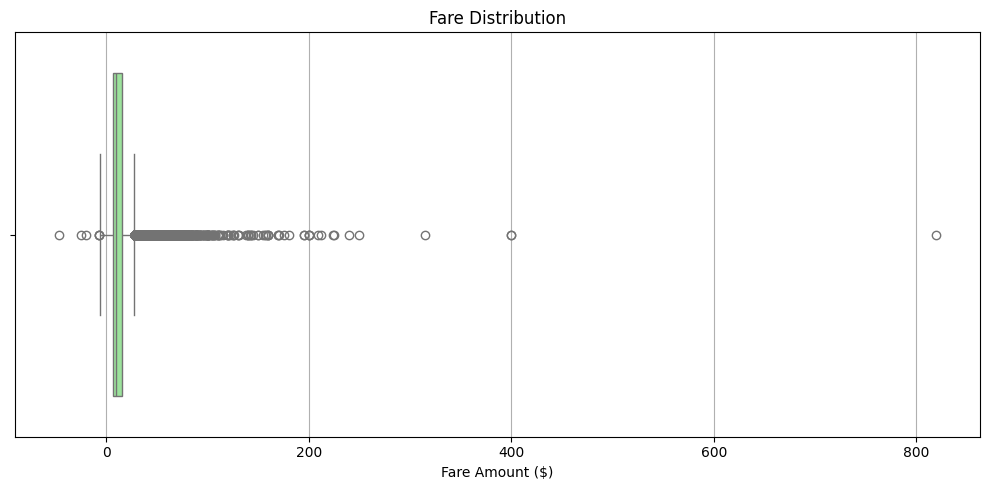

In [9]:
# Step 1: Create a box plot for fare distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare_amount'], color='lightgreen')
plt.title('Fare Distribution')
plt.xlabel('Fare Amount ($)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Box Plot for Tip Amounts by Payment Type

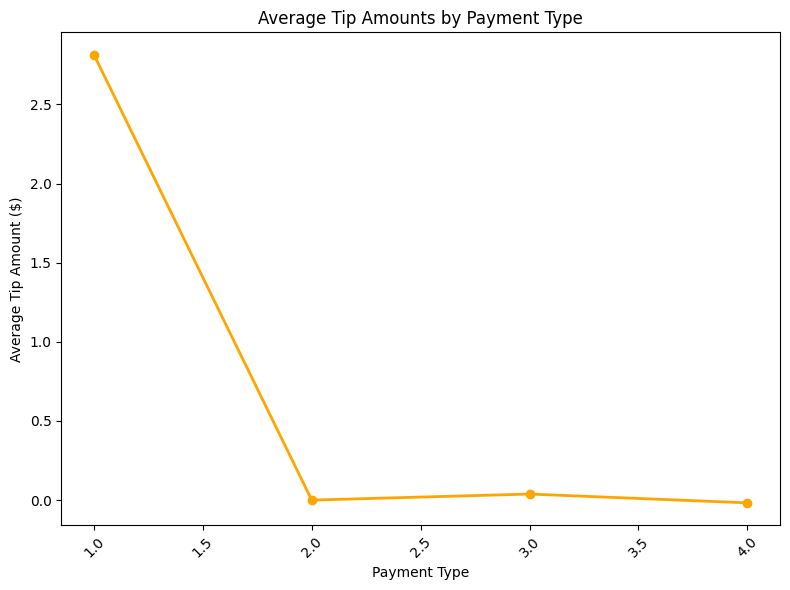

In [29]:
# Calculate the average tip amount by payment type
avg_tips = df.groupby('payment_type')['tip_amount'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(avg_tips['payment_type'], avg_tips['tip_amount'], marker='o', color='orange', linestyle='-', linewidth=2)

# Add title and labels
plt.title('Average Tip Amounts by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Amount ($)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the layout for better fitting
plt.tight_layout()

# Show the plot
plt.show()

# Cancellations Over Time

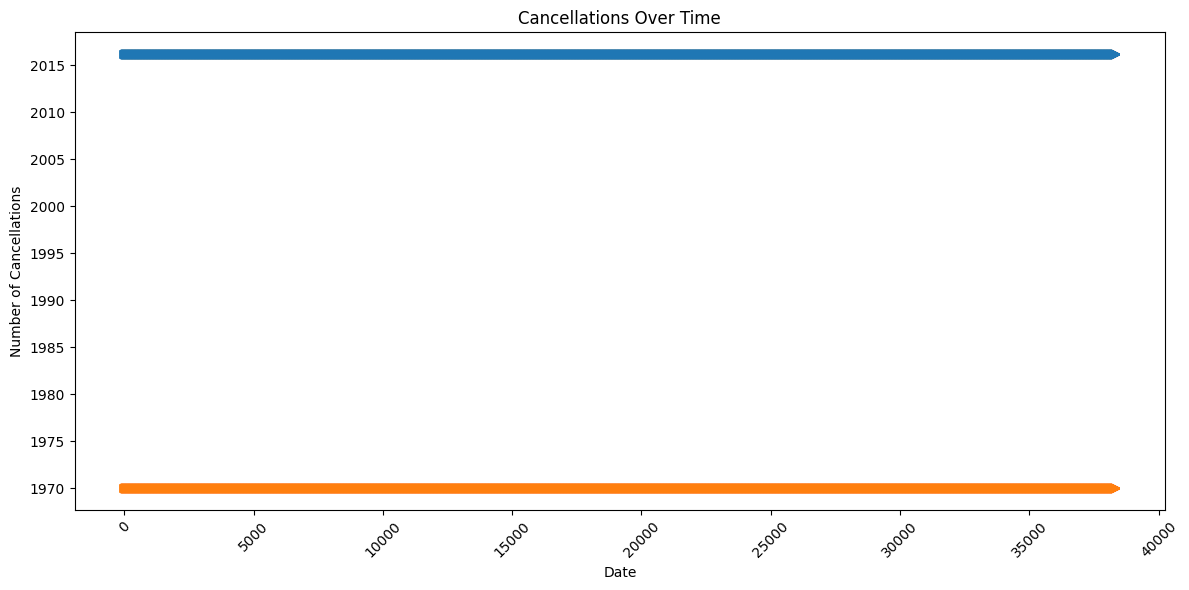

In [49]:

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(cancellations_over_time.index, cancellations_over_time.values, marker='>', linestyle='-')
plt.title('Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Amount Charged by Hour

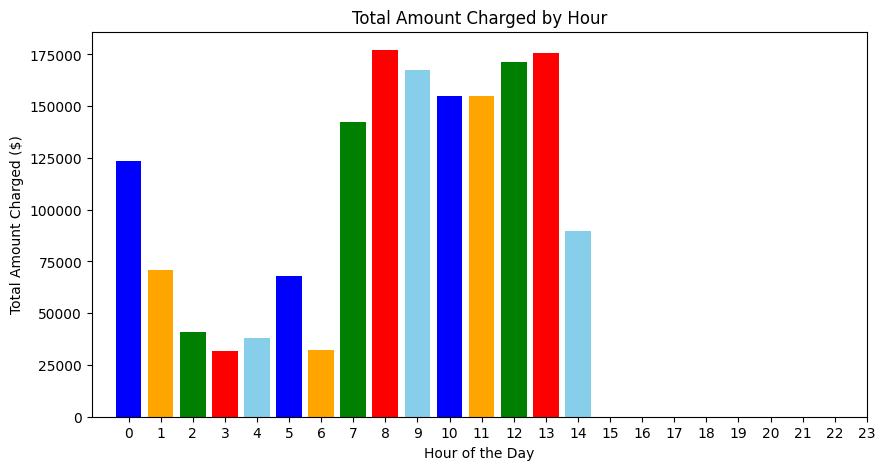

In [39]:
# Step 1: Convert 'tpep_pickup_datetime' to datetime and extract the hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Step 2: Group by hour and sum the total amount
total_amount_by_hour = df.groupby('pickup_hour')['total_amount'].sum().reset_index()

# Step 3: Plot the data
plt.figure(figsize=(10, 5))
plt.bar(total_amount_by_hour['pickup_hour'], total_amount_by_hour['total_amount'], color =['blue', 'orange', 'green','red','skyblue'])
plt.title('Total Amount Charged by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Amount Charged ($)')
plt.xticks(range(24))  # Show all hours on the x-axis
plt.show()

# Passenger Count vs. Trip Distance

C:\Users\hp\AppData\Local\Temp\ipykernel_4792\3271237760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_distance, x='passenger_count', y='trip_distance', palette='viridis')


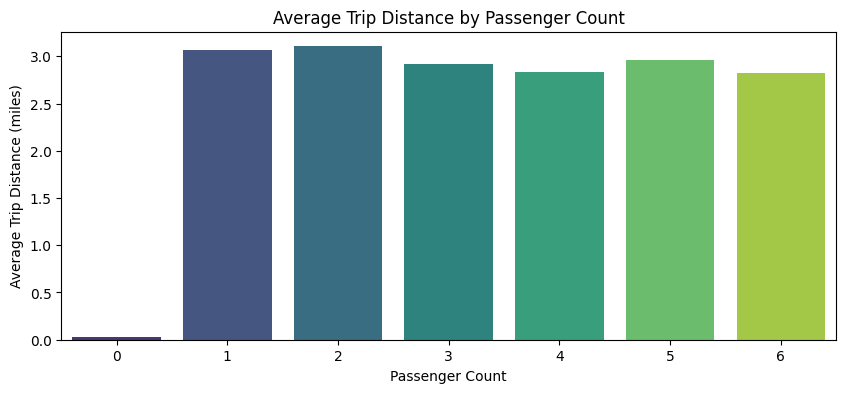

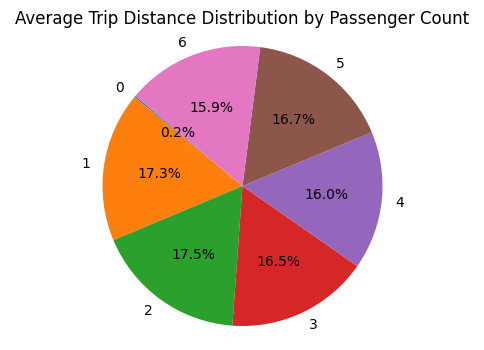

In [50]:

#bar graph
# Step 1: Calculate average trip distance for each passenger count
average_distance = df.groupby('passenger_count')['trip_distance'].mean().reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 4))
sns.barplot(data=average_distance, x='passenger_count', y='trip_distance', palette='viridis')
plt.title('Average Trip Distance by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

#pie graph

# Step 1: Calculate average trip distance for each passenger count
average_distance = df.groupby('passenger_count')['trip_distance'].mean()

# Step 2: Plot the pie chart
plt.figure(figsize=(6,4))
plt.pie(average_distance, labels=average_distance.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Trip Distance Distribution by Passenger Count')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()